In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("day.csv")

In [5]:
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.isna().sum()/df.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<AxesSubplot:>

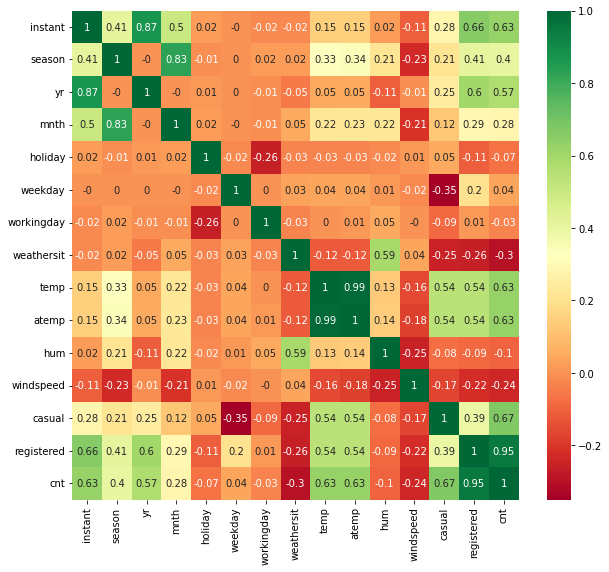

In [8]:
plt.figure(figsize=(10,9))
import seaborn as sns
sns.heatmap(df.corr().round(2), annot= True, cmap= "RdYlGn")

In [9]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
d = {1: "winter", 2: "Spring", 3: "Summer", 4: "fall"}
df.season = df.season.apply(lambda x: d[x])

In [11]:
df.season.value_counts()

Summer    188
Spring    184
winter    180
fall      178
Name: season, dtype: int64

In [12]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
d = {1:"Clear/sunny", 2: "cloudy/rainy/snowy", 3: 'hailstorm/thunderstorm/snowstorm'}
df.weathersit = df.weathersit.apply(lambda x: d[x])

In [15]:
df.weathersit.value_counts()

Clear/sunny                         463
cloudy/rainy/snowy                  246
hailstorm/thunderstorm/snowstorm     21
Name: weathersit, dtype: int64

In [16]:
ssn = pd.get_dummies(df.season,drop_first=True)
df.drop(columns = ["season"], inplace=True)
df = pd.concat([df,ssn], axis = 1)

In [17]:
df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,fall,winter
0,1,01-01-2018,0,1,0,1,1,cloudy/rainy/snowy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,0,1,0,2,1,cloudy/rainy/snowy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,0,1,0,3,1,Clear/sunny,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1
3,4,04-01-2018,0,1,0,4,1,Clear/sunny,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1
4,5,05-01-2018,0,1,0,5,1,Clear/sunny,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1


In [18]:
weather_sit = pd.get_dummies(df.weathersit,drop_first=True)
df.pop("weathersit")
df = pd.concat([df,weather_sit], axis = 1)

In [19]:
df.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,fall,winter,cloudy/rainy/snowy,hailstorm/thunderstorm/snowstorm
0,1,01-01-2018,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,1,0
1,2,02-01-2018,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,1,0
2,3,03-01-2018,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,04-01-2018,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,05-01-2018,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [20]:
## Sclaing the values
# - Minmax scaler X_std * (max -min) + min
# - standard scaler average


In [21]:
from sklearn.preprocessing import MinMaxScaler as scale
from sklearn.model_selection import train_test_split
scaler = scale()

In [22]:
X = df.copy()


In [23]:
X.pop("dteday")

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

In [24]:
# X_train[["weekday", "temp", "atemp", "hum", "windspeed", "casual", "registered"]]

In [25]:
col = ["instant", "weekday", "mnth", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
X[col] = scaler.fit_transform(X[col])


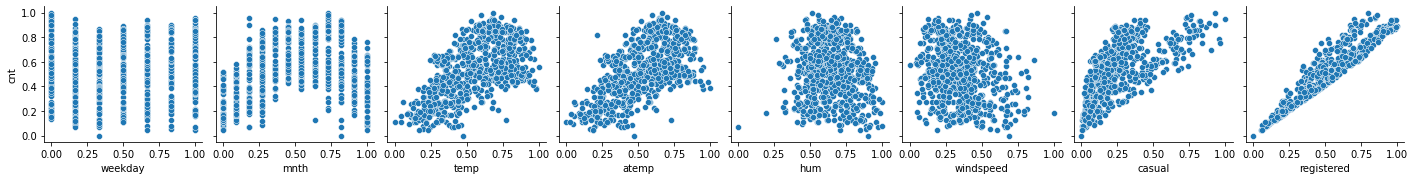

In [26]:
sns.pairplot(data=X, x_vars= ["weekday", "mnth", "temp", "atemp", "hum", "windspeed", "casual", "registered"], y_vars= 'cnt')

In [27]:
y = X.pop('cnt')
X_train, X_test, y_train, y_test  = train_test_split(X,y, random_state=45, train_size=0.6)

In [28]:
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import regression

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
X_train_sm = add_constant(X_train)
X_train_sm

,const,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,Summer,fall,winter,cloudy/rainy/snowy,hailstorm/thunderstorm/snowstorm
474,1.0,0.650206,1,0.272727,0,1.000000,0,0.582574,0.573235,0.714224,0.262805,0.392606,0.856194,0,0,0,0,0
113,1.0,0.155007,0,0.272727,0,0.333333,1,0.651106,0.620474,0.833761,0.350017,0.501174,0.355328,0,0,0,1,0
347,1.0,0.475995,0,1.000000,0,0.833333,1,0.321941,0.340356,0.682519,0.079507,0.051643,0.511406,0,1,0,1,0
132,1.0,0.181070,0,0.363636,0,0.000000,0,0.564921,0.545046,0.887746,0.324351,0.202465,0.489893,0,0,0,1,0
50,1.0,0.068587,0,0.090909,0,0.333333,1,0.281715,0.260244,0.419358,0.414049,0.186913,0.166474,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.0,0.994513,1,1.000000,0,0.833333,1,0.243025,0.193709,0.671380,0.675656,0.071890,0.266676,0,0,1,1,0
607,1.0,0.832647,1,0.636364,0,1.000000,0,0.878510,0.801141,0.604113,0.301278,0.419894,0.851429,1,0,0,0,0
544,1.0,0.746228,1,0.454545,0,1.000000,0,0.965734,0.928746,0.502571,0.294854,0.242664,0.666185,1,0,0,0,0
643,1.0,0.882030,1,0.818182,0,0.000000,0,0.616840,0.603092,0.682948,0.506386,0.888791,0.709500,0,1,0,0,0


In [ ]:
linear_regression = sm.OLS(y_train, X_train_sm)
linear_regression = linear_regression.fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.069e+29
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:41:40   Log-Likelihood:                 14350.
No. Observations:                 438   AIC:                        -2.866e+04
Df Residuals:                     420   BIC:                        -2.859e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             3.747e-16    6.6e-16      0.568      0.570   -9.22e-16    1.67e-15
instant                          -2.554e-15   5.83e-15     -0.438      0.662    -1.4e-14    8.91e-15
yr                                2.054e-15   2.94e-15      0.698      0.485   -3.73e-15    7.83e-15
mnth                              1.277e-15   2.72e-15      0.470      0.639   -4.06e-15    6.62e-15
holiday                           2.151e-16   4.12e-16      0.522      0.602   -5.95e-16    1.02e-15
weekday                          -1.318e-16   2.59e-16     -0.510      0.611    -6.4e-16    3.77e-16
workingday                        2.828e-16   1.63e-16      1.736      0.083   -3.74e-17    6.03e-16
temp                             -1.332e-15   2.19e-15     -0.608      0.543   -5.64e-15    2.97e-15
atemp                              2.22e-16   2.21e-15      0.100      0.920   -4.13e-15    4.57e-15
hum                               6.245e-16   6.74e-16      0.927      0.354      -7e-16    1.95e-15
windspeed                         1.475e-17   4.76e-16      0.031      0.975    -9.2e-16     9.5e-16
casual                               0.3921   5.32e-16   7.37e+14      0.000       0.392       0.392
registered                           0.7968    6.8e-16   1.17e+15      0.000       0.797       0.797
Summer                           -9.714e-17   2.63e-16     -0.370      0.712   -6.13e-16    4.19e-16
fall                             -1.162e-16   3.31e-16     -0.351      0.726   -7.67e-16    5.35e-16
winter                           -3.261e-16   2.94e-16     -1.111      0.267   -9.03e-16    2.51e-16
cloudy/rainy/snowy                1.457e-16   1.95e-16      0.746      0.456   -2.38e-16     5.3e-16
hailstorm/thunderstorm/snowstorm -4.857e-17   5.12e-16     -0.095      0.924   -1.05e-15    9.57e-16
==============================================================================
Omnibus:                      141.707   Durbin-Watson:                   0.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.099
Skew:                           0.049   Prob(JB):                     1.59e-05
Kurtosis:                       1.904   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_sm.columns
vif_data["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [ ]:
vif_data

,feature,VIF
0,const,89.421221
1,instant,587.171118
2,yr,444.138488
3,mnth,152.430059
4,holiday,1.153525
5,weekday,1.497960
6,workingday,1.162641
7,temp,53.832137
8,atemp,48.432251
9,hum,1.971171


In [ ]:
X_train_sm.pop("atemp")
X_test.pop("atemp")

499    0.652819
647    0.556652
549    0.857502
656    0.602272
384    0.186248
         ...   
547    0.817730
267    0.647874
108    0.538428
392    0.324627
186    0.796196
Name: atemp, Length: 292, dtype: float64

In [ ]:
linear_regression = sm.OLS(y_train, X_train_sm)
linear_regression = linear_regression.fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.451e+30
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:51:26   Log-Likelihood:                 14527.
No. Observations:                 438   AIC:                        -2.902e+04
Df Residuals:                     421   BIC:                        -2.895e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             3.331e-16   4.39e-16      0.758      0.449    -5.3e-16     1.2e-15
instant                          -2.998e-15   3.88e-15     -0.772      0.441   -1.06e-14    4.64e-15
yr                                1.776e-15   1.96e-15      0.907      0.365   -2.07e-15    5.63e-15
mnth                              1.388e-15   1.81e-15      0.767      0.444   -2.17e-15    4.95e-15
holiday                          -2.706e-16   2.75e-16     -0.986      0.325    -8.1e-16    2.69e-16
weekday                           3.747e-16   1.72e-16      2.177      0.030    3.64e-17    7.13e-16
workingday                        1.982e-16   1.08e-16      1.831      0.068   -1.46e-17    4.11e-16
temp                             -1.388e-16   4.35e-16     -0.319      0.750   -9.93e-16    7.16e-16
hum                              -1.249e-16   4.49e-16     -0.278      0.781   -1.01e-15    7.57e-16
windspeed                         4.857e-17   3.13e-16      0.155      0.877   -5.68e-16    6.65e-16
casual                               0.3921   3.55e-16   1.11e+15      0.000       0.392       0.392
registered                           0.7968   4.53e-16   1.76e+15      0.000       0.797       0.797
Summer                            1.943e-16   1.73e-16      1.121      0.263   -1.46e-16    5.35e-16
fall                               1.11e-16   2.21e-16      0.503      0.615   -3.23e-16    5.45e-16
winter                           -1.596e-16   1.96e-16     -0.816      0.415   -5.44e-16    2.25e-16
cloudy/rainy/snowy                3.435e-16    1.3e-16      2.637      0.009    8.74e-17       6e-16
hailstorm/thunderstorm/snowstorm  4.718e-16   3.41e-16      1.385      0.167   -1.98e-16    1.14e-15
==============================================================================
Omnibus:                        9.387   Durbin-Watson:                   0.215
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.458
Skew:                           0.334   Prob(JB):                      0.00884
Kurtosis:                       2.732   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_sm.columns
vif_data["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [ ]:
vif_data

,feature,VIF
0,const,89.206998
1,instant,586.121390
2,yr,443.453953
3,mnth,152.166806
4,holiday,1.153502
5,weekday,1.492708
6,workingday,1.156092
7,temp,4.768195
8,hum,1.968685
9,windspeed,1.256610


In [ ]:
X_train_sm.pop("yr")
X_test.pop("yr")
linear_regression = sm.OLS(y_train, X_train_sm)
linear_regression = linear_regression.fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.367e+29
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:53:19   Log-Likelihood:                 14193.
No. Observations:                 438   AIC:                        -2.835e+04
Df Residuals:                     422   BIC:                        -2.829e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             6.939e-18   9.32e-16      0.007      0.994   -1.83e-15    1.84e-15
instant                           7.355e-16   6.46e-16      1.138      0.256   -5.35e-16    2.01e-15
mnth                             -6.939e-17   6.91e-16     -0.100      0.920   -1.43e-15    1.29e-15
holiday                           1.527e-16   5.87e-16      0.260      0.795      -1e-15    1.31e-15
weekday                           4.094e-16   3.68e-16      1.112      0.267   -3.14e-16    1.13e-15
workingday                        2.134e-16   2.32e-16      0.919      0.359   -2.43e-16     6.7e-16
temp                              6.384e-16   9.32e-16      0.685      0.494   -1.19e-15    2.47e-15
hum                               5.135e-16   9.56e-16      0.537      0.591   -1.36e-15    2.39e-15
windspeed                         2.429e-17   6.72e-16      0.036      0.971    -1.3e-15    1.34e-15
casual                               0.3921    7.6e-16   5.16e+14      0.000       0.392       0.392
registered                           0.7968   9.62e-16   8.29e+14      0.000       0.797       0.797
Summer                            6.661e-16   3.71e-16      1.794      0.073   -6.35e-17     1.4e-15
fall                              1.631e-16   4.73e-16      0.345      0.731   -7.67e-16    1.09e-15
winter                            3.574e-16   4.19e-16      0.853      0.394   -4.66e-16    1.18e-15
cloudy/rainy/snowy                7.633e-17   2.77e-16      0.276      0.783   -4.67e-16     6.2e-16
hailstorm/thunderstorm/snowstorm -2.914e-16   7.28e-16     -0.400      0.689   -1.72e-15    1.14e-15
==============================================================================
Omnibus:                       12.169   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.630
Skew:                          -0.224   Prob(JB):                       0.0134
Kurtosis:                       2.478   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_sm.columns
vif_data["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

In [ ]:
vif_data

,feature,VIF
0,const,87.494081
1,instant,3.530190
2,mnth,4.825137
3,holiday,1.148281
4,weekday,1.485859
5,workingday,1.156090
6,temp,4.768190
7,hum,1.941545
8,windspeed,1.255157
9,casual,2.268272


In [ ]:
X_train_sm.pop("windspeed")
X_test.pop("windspeed")
linear_regression = sm.OLS(y_train, X_train_sm)
linear_regression = linear_regression.fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.256e+29
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:56:08   Log-Likelihood:                 13961.
No. Observations:                 438   AIC:                        -2.789e+04
Df Residuals:                     423   BIC:                        -2.783e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.499e-15   1.33e-15      1.127      0.260   -1.11e-15    4.11e-15
instant                           3.608e-16   1.09e-15      0.331      0.741   -1.78e-15     2.5e-15
mnth                             -2.038e-16   1.17e-15     -0.174      0.862    -2.5e-15     2.1e-15
holiday                          -1.964e-15   9.95e-16     -1.973      0.049   -3.92e-15   -7.11e-18
weekday                           4.233e-16   6.22e-16      0.680      0.497      -8e-16    1.65e-15
workingday                        4.692e-16   3.93e-16      1.193      0.234   -3.04e-16    1.24e-15
temp                                      0   1.57e-15          0      1.000   -3.09e-15    3.09e-15
hum                               8.188e-16   1.51e-15      0.541      0.589   -2.16e-15    3.79e-15
casual                               0.3921   1.28e-15   3.06e+14      0.000       0.392       0.392
registered                           0.7968   1.62e-15   4.92e+14      0.000       0.797       0.797
Summer                            3.192e-16   6.24e-16      0.511      0.609   -9.08e-16    1.55e-15
fall                              8.014e-16      8e-16      1.002      0.317   -7.71e-16    2.37e-15
winter                            2.637e-16   7.08e-16      0.372      0.710   -1.13e-15    1.66e-15
cloudy/rainy/snowy                5.447e-16   4.67e-16      1.168      0.244   -3.72e-16    1.46e-15
hailstorm/thunderstorm/snowstorm  4.233e-16   1.22e-15      0.346      0.729   -1.98e-15    2.83e-15
==============================================================================
Omnibus:                      118.017   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.347
Skew:                           1.242   Prob(JB):                     1.26e-79
Kurtosis:                       6.707   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_sm.columns
vif_data["VIF"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif_data

,feature,VIF
0,const,61.904317
1,instant,3.494648
2,mnth,4.814926
3,holiday,1.148052
4,weekday,1.477116
5,workingday,1.155892
6,temp,4.730722
7,hum,1.696123
8,casual,2.237309
9,registered,4.771253
